In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [2]:
file_path = 'student_mental_health.csv'
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [5]:
numerical_columns = data.select_dtypes(include=['number']).columns

print("Kolom numerik:", numerical_columns)

Kolom numerik: Index(['Age'], dtype='object')


In [6]:
# Data Cleaning: Isi nilai yang hilang di Usia
data['Age'].fillna(data['Age'].mean(), inplace=True)

<ipython-input-6-5b634f64f18c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [7]:
# Encode categorical variables
encoded_data = pd.get_dummies(data, drop_first=True)

In [8]:
# Target variable: 'Do you have Depression?'
y = data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
X = encoded_data.drop(columns=['Do you have Depression?_Yes'])

In [9]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest tanpa persiapan data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi
rf_pred = rf_model.predict(X_test)
print("Accuracy (No Data Preparation):", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Accuracy (No Data Preparation): 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21



In [10]:
# Simpan modelnya
with open('rf_model_no_prep.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [11]:
# Model 2: Random Forest dengan data preparation (Scaling and Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model_scaled = RandomForestClassifier(random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
rf_pred_scaled = rf_model_scaled.predict(X_test_scaled)
print("Accuracy (With Data Preparation):", accuracy_score(y_test, rf_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, rf_pred_scaled))

Accuracy (With Data Preparation): 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21



In [12]:
# Simpan model terbaik (anggap model berskala lebih baik)
with open('rf_model_scaled.pkl', 'wb') as f:
    pickle.dump(rf_model_scaled, f)

In [13]:
# Data Preparation
# Tampilan missing values
print("Missing Values:")
print(data.isnull().sum())

# Isi nilai yang hilang atau hapus baris dengan nilai yang hilang (ubah seperlunya)data = data.dropna()

# Pengkodean variabel kategori jika diperlukan
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Tampilan prepared data
print("Data after preparation:")
print(data.head())


Missing Values:
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
Data after preparation:
    Age  Timestamp_13/07/2020 10:10:30  Timestamp_13/07/2020 10:11:26  \
0  18.0                          False                          False   
1  21.0                          False                          False   
2  19.0                          False                          False   
3  22.0                          False                          False   
4  23.0                         

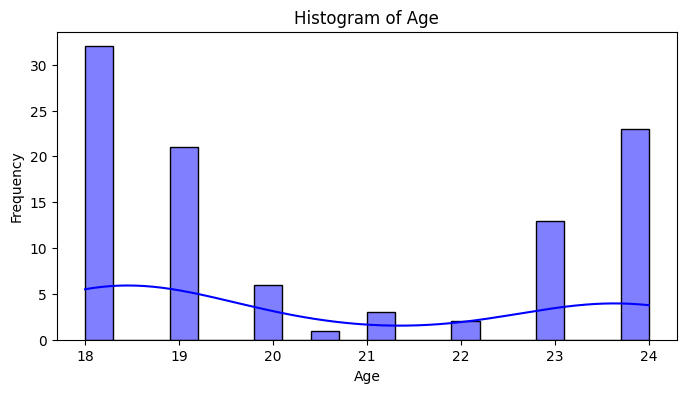

In [15]:
# Histogram untuk setiap fitur numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [16]:
# Klasifikasi menggunakan Random Forest
# Dengan asumsi variabel target adalah kolom terakhir
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Memprediksi on test data
y_pred = clf.predict(X_test)

# Evaluaasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        19
        True       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.47        21
weighted avg       0.82      0.90      0.86        21

Accuracy: 0.9047619047619048


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
import joblib

In [19]:
from joblib import dump, load

# Menyimpan model ke file .joblib
dump(clf, "random_forest_model.joblib")
print("Model tersimpan random_forest_model.joblib")


Model saved as random_forest_model.joblib
